# Example2 - LAUTAT code 

### In this study, the results from LAUTAT are compared against Theodorsen's theory

In [2]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

### Case details:
### A flat plate undergoes a sinusoidal pitch motion of amplitude 10 deg and reduced frequency 0.5. The resulting pitch history is shown below


In [11]:
#Say we want to run the simulation for 5 cycles of motion.
ncyc = 5
alpha_mean = 0.
alpha_amp = 10*pi/180
k = 0.5
phi = 0. 
T = pi/k # time period
t_tot = ncyc*T



31.41592653589793

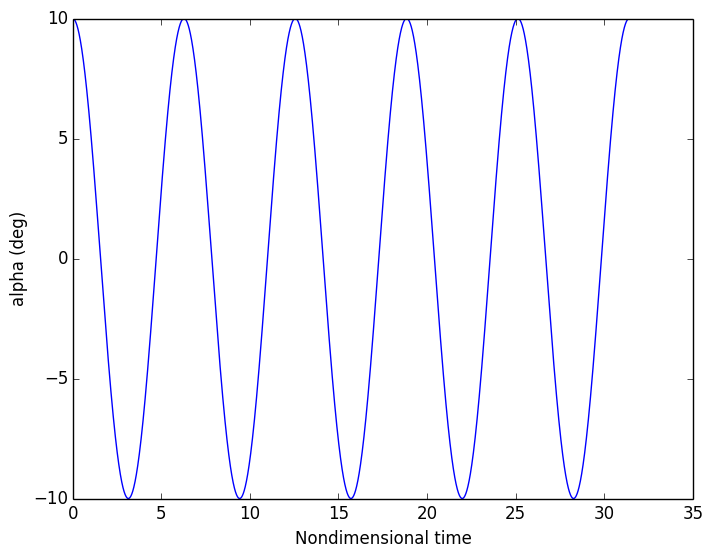

PyObject <matplotlib.text.Text object at 0x31e3d3d90>

  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/kiran/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/kiran/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/kiran/.julia/v0.5/PyCall/src/PyCall.jl
  li

In [4]:
#This block is just for visualising the motion history - not required for the simulation

#Nondimensional time
t = 0:0.01:t_tot

#Declare an empty array for pitch angle, same length as time
alpha = zeros(length(t))

#Functional definition of the Cos/Sinfunction. First argument is mean value in radians, 
#second is amplitude in radians, third is reduced frequency and fourth is phase angle in radians
alphadef = CosDef(alpha_mean, alpha_amp, k, phi)

#Generate values of alpha at the times required. 
for i = 1:length(t)
    alpha[i] = alphadef(t[i])
end

plot(t,alpha*180/pi)

xlabel("Nondimensional time")
ylabel("alpha (deg)")

#To use latex symbols in the labels, uncomment and try the following: (issues with this, ignore for now)
#xlabel(L"$t^*$")
#ylabel(L"$\alpha$ (deg)")

### Going back to the problem. Define all the kinematics.





In [17]:
#Define pitch angle as described above
alphadef = CosDef(alpha_mean, alpha_amp, k, phi)


#Plunge magnitude is constant = 0
h_amp = 0.
hdef = ConstDef(h_amp)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

UNSflow.KinemDef(UNSflow.CosDef(0.0,0.17453292519943295,0.5,0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0))

### Define the surface undergoing motion and the flowfield

In [6]:
pvt = 0.25 #quarter chord

surf = TwoDSurf("FlatPlate", pvt, full_kinem)

curfield = TwoDFlowField()



UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

### Specify simulation details and run code

In [7]:
#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

nsteps = Int(round(t_tot/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = lautat(surf, curfield, nsteps)


 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kiran/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kiran/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kiran/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in lautat(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef, ::Array{Float64,2}, ::Float64) at /Users/kiran/Documents/Projects/UNSflow/src/solvers.jl:30
 in lautat(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64) at /Users/kiran/Documents/Projects/UNSflow/src/solvers.jl:3
 in incl

(
[0.015 0.174513 … 3.30712 -4.05637; 0.03 0.174454 … 0.0409242 0.0041747; … ; 31.395 0.174495 … 0.0318917 0.0210089; 31.41 0.17453 … 0.0302313 0.0234632],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.25,70,35,UNSflow.KinemDef(UNSflow.CosDef(0.0,0.17453292519943295,0.5,0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.17452986007620472,0.0,0.0010343695912294843,0.0,1.0,0.0),[-32.4062,-32.4057,-32.4042,-32.4016,-32.3981,-32.3935,-32.3879,-32.3814,-32.37

### Studying the results

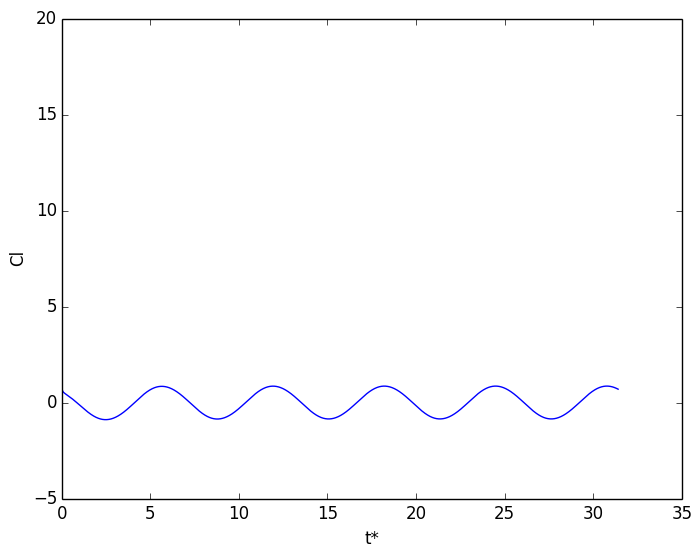

PyObject <matplotlib.text.Text object at 0x3103fcad0>

In [14]:
### Let's look at the simulation results
# surf and curfield refer to the airfoil and the flowfield.
# mat contains quantites of interest -> (time,pitch,plunge,velocity,A0,Cl,Cd,Cm)

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
xlabel("t*")
ylabel("Cl")


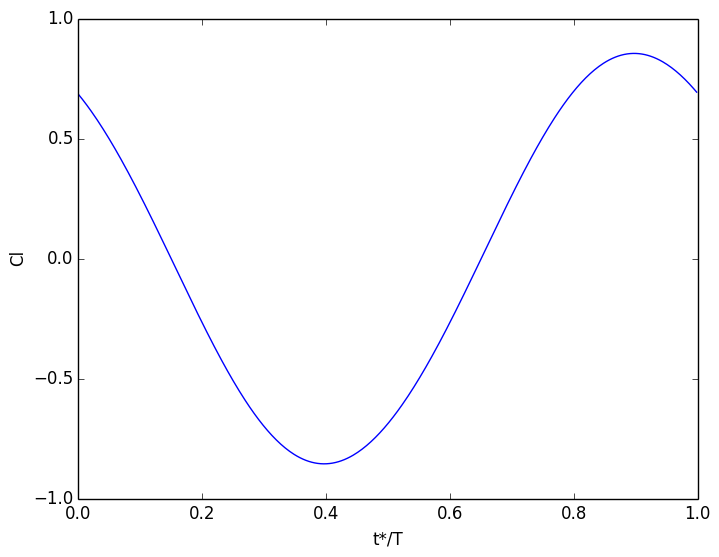

PyObject <matplotlib.text.Text object at 0x31ef9efd0>

In [15]:
#Lets look at the result for just the last (hopefully converged) cycle

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1] - mat[range[1]])/T #time divided by time period 

plot(tbyT,mat[range,6])

xlabel("t*/T")
ylabel("Cl")


### Theodorsen's theory is implemented in UNSflow as follows:

In [23]:
#Define input as shown
alpha_zl = 0. #zero-lift angle of attack - 0 for a flat plate in this case 
theo_in = TheoDef(alpha_amp, h_amp, alpha_mean, alpha_zl, k, phi, pvt) 

#Run the code
t_theo, cl_h, cl_alpha, cl_tot = theodorsen(theo_in)


([0.0,0.00277778,0.00555556,0.00833333,0.0111111,0.0138889,0.0166667,0.0194444,0.0222222,0.025  …  0.975,0.977778,0.980556,0.983333,0.986111,0.988889,0.991667,0.994444,0.997222,1.0],Complex{Float64}[0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im  …  0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im,0.0-0.0im],Complex{Float64}[0.669807+0.436739im,0.662083+0.448363im,0.654157+0.459849im,0.646032+0.471196im,0.63771+0.482399im,0.629194+0.493455im,0.620486+0.504361im,0.611589+0.515113im,0.602506+0.525708im,0.59324+0.536143im  …  0.729882+0.326581im,0.724071+0.33927im,0.71804+0.351855im,0.71179+0.364333im,0.705323+0.3767im,0.698641+0.388952im,0.691746+0.401086im,0.684641+0.413097im,0.677327+0.424983im,0.669807+0.436739im],Complex{Float64}[0.669807+0.436739im,0.662083+0.448363im,0.654157+0.459849im,0.646032+0.471196im,0.63771+0.482399im,0.629194+0.493455im,0.620486+0.504361im,0.611589+0.515113im,0.602

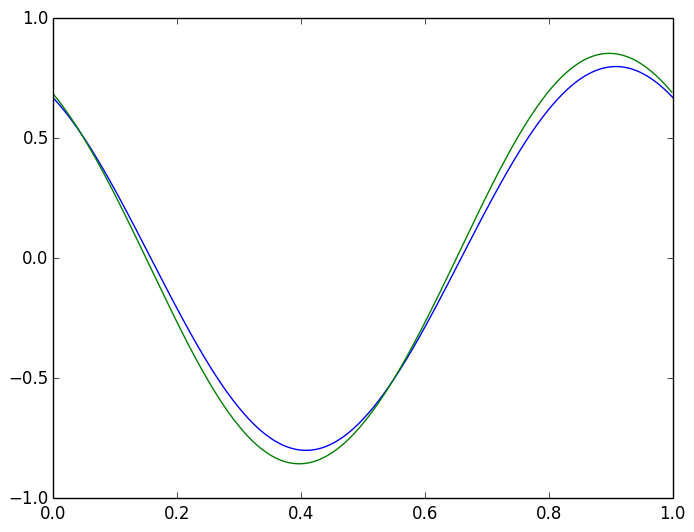

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ff4f690>

In [26]:
#Plot the lift coefficient and compare against UNSflow
plot(t_theo,cl_tot)
plot(tbyT,mat[range,6])